In [1]:
import pydicom
import os
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
from PIL import Image
import numpy as np
import cv2
import vtk

In [2]:
path = "D:/IACTA/task1/test/sub-0001.nii.gz"
files = os.listdir(path)
slices = []
for i in files:
    ds = sitk.ReadImage(os.path.join(path,i))
    img_array = sitk.GetArrayFromImage(ds)
    img = np.asarray(Image.fromarray(img_array[0]))
    slices.append(img)

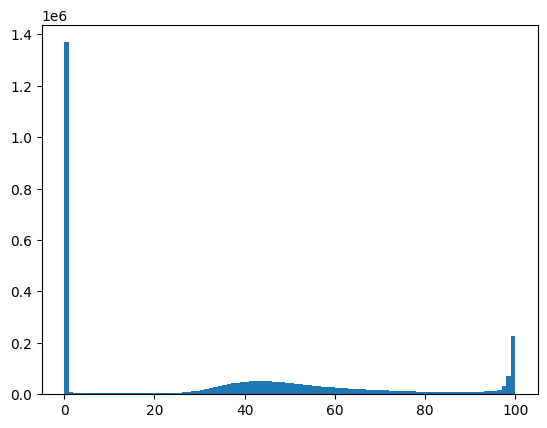

In [3]:
plt.hist(np.array(slices).flatten(), bins=100)
plt.show()

In [ ]:
# def clip(image, hu_min, hu_max):
#     image[image < hu_min] = hu_min
#     image[image > hu_max] = hu_max
#     return image
    
# for i,s in enumerate(slices):
#     if(i%5==0):
#         sample = np.array(s)
#         sample = clip(sample, 70, 80) 
#         plt.imshow(sample, cmap='bone')
#         plt.show()

In [6]:
def dicom_to_nii(dcm_path,nii_path):
    reader = sitk.ImageSeriesReader()
    dcm_names = reader.GetGDCMSeriesFileNames(dcm_path)
    reader.SetFileNames(dcm_names)
    img = reader.Execute()

    img_arr = sitk.GetArrayFromImage(img)
    origin = img.GetOrigin()
    spacing = img.GetSpacing()
    direction = img.GetDirection()

    img_nii = sitk.GetImageFromArray(img_arr)
    img_nii.SetSpacing(spacing)
    img_nii.SetDirection(direction)
    img_nii.SetOrigin(origin)
    sitk.WriteImage(img_nii,nii_path)

In [8]:
dcm_path = "D:/IACTA/task1/test/sub-0001.nii.gz/"
nii_path = "D:/IACTA/task1/test/nii/sub-0001.nii.gz"
dicom_to_nii(dcm_path,nii_path)